# <center> **Master Thesis**
# <center> “Detecting Fake News in Social Networks using ML/DL”
### <center> (2022-2023)

## <center> Álvaro Camiña Magro
## <center> Alfonso Sánchez Macián
### <center> *Puerta de Toledo, 2023*

## Initial libraries and importing data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
from IPython.display import display
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import regex as re
import matplotlib.pyplot as plt
import statistics
import math
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers
from transformers import RobertaTokenizer, TFRobertaModel
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, GRU, Dense,Input, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
from keras.utils import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential, load_model
from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional,Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from transformers import BertTokenizerFast, TFBertModel, RobertaTokenizerFast, TFRobertaModel
from collections import Counter
from sklearn.utils import shuffle
import sentencepiece
from transformers import XLNetTokenizer, XLNetModel
from IPython.display import display, HTML
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from transformers import AutoTokenizer
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('/Users/alvarocaminamagro/Documents/Datasets_estudio/election.xlsx')
df.dataframeName = 'election.xlsx'

In [ ]:
df.shape

(1327, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   is_fake_news           1327 non-null   bool   
 1   fake_news_category     136 non-null    float64
 2   tweet_id               1327 non-null   int64  
 3   created_at             1327 non-null   object 
 4   retweet_count          1327 non-null   int64  
 5   text                   1327 non-null   object 
 6   user_screen_name       1327 non-null   object 
 7   user_verified          1327 non-null   bool   
 8   user_friends_count     1327 non-null   int64  
 9   user_followers_count   1327 non-null   int64  
 10  user_favourites_count  1327 non-null   int64  
 11  tweet_source           1327 non-null   object 
 12  geo_coordinates        1327 non-null   int64  
 13  num_hashtags           1327 non-null   int64  
 14  num_mentions           1327 non-null   int64  
 15  num_

## Preprocessing

In [ ]:
df.iloc[88]

is_fake_news                                                         False
fake_news_category                                                     NaN
tweet_id                                                719474959286800385
created_at                                  Mon Apr 11 10:39:32 +0000 2016
retweet_count                                                         1850
text                     .@BernieSanders wins WY but @HillaryClinton ne...
user_screen_name                                               Morning_Joe
user_verified                                                         True
user_friends_count                                                     433
user_followers_count                                                272083
user_favourites_count                                                  284
tweet_source             <a href="http://snappytv.com" rel="nofollow">S...
geo_coordinates                                                          0
num_hashtags             

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

is_fake_news                0
fake_news_category       1191
tweet_id                    0
created_at                  0
retweet_count               0
text                        0
user_screen_name            0
user_verified               0
user_friends_count          0
user_followers_count        0
user_favourites_count       0
tweet_source                0
geo_coordinates             0
num_hashtags                0
num_mentions                0
num_urls                    0
num_media                   0
dtype: int64


In [ ]:
df.head()

,is_fake_news,fake_news_category,tweet_id,created_at,retweet_count,text,user_screen_name,user_verified,user_friends_count,user_followers_count,user_favourites_count,tweet_source,geo_coordinates,num_hashtags,num_mentions,num_urls,num_media
0,False,NaN,264033382076407808,Thu Nov 01 15:57:18 +0000 2012,4698,@realDonaldTrump you are full of shit!,RalphGilles,True,763,26680,3079,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0
1,False,NaN,265895586660757505,Tue Nov 06 19:17:02 +0000 2012,9646,@realDonaldTrump you're fucking retarded,TimmyWait,False,839,397,504,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,2,0,0
2,False,NaN,265895723445411841,Tue Nov 06 19:17:35 +0000 2012,1823,@realDonaldTrump You are the stupidest man on ...,mattcale52,False,1184,1353,3355,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0
3,False,NaN,265896172726661120,Tue Nov 06 19:19:22 +0000 2012,1168,@realDonaldTrump I am continually amazed and t...,MichaelWHill,False,1603,704,1479,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0
4,False,NaN,266042962650226688,Wed Nov 07 05:02:39 +0000 2012,1979,Hey @realDonaldTrump You Mad Bro?,ThePresObama,False,135,70218,931,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,2,0,0


In [ ]:
df = df.drop(columns=['fake_news_category','tweet_id','created_at','num_urls', 'user_screen_name','tweet_source','geo_coordinates','num_hashtags','num_mentions','num_media'], axis =1)

In [ ]:
df.head()

,is_fake_news,retweet_count,text,user_verified,user_friends_count,user_followers_count,user_favourites_count
0,False,4698,@realDonaldTrump you are full of shit!,True,763,26680,3079
1,False,9646,@realDonaldTrump you're fucking retarded,False,839,397,504
2,False,1823,@realDonaldTrump You are the stupidest man on ...,False,1184,1353,3355
3,False,1168,@realDonaldTrump I am continually amazed and t...,False,1603,704,1479
4,False,1979,Hey @realDonaldTrump You Mad Bro?,False,135,70218,931


Text(0.5, 1.0, 'The distribution of real and fake tweets')

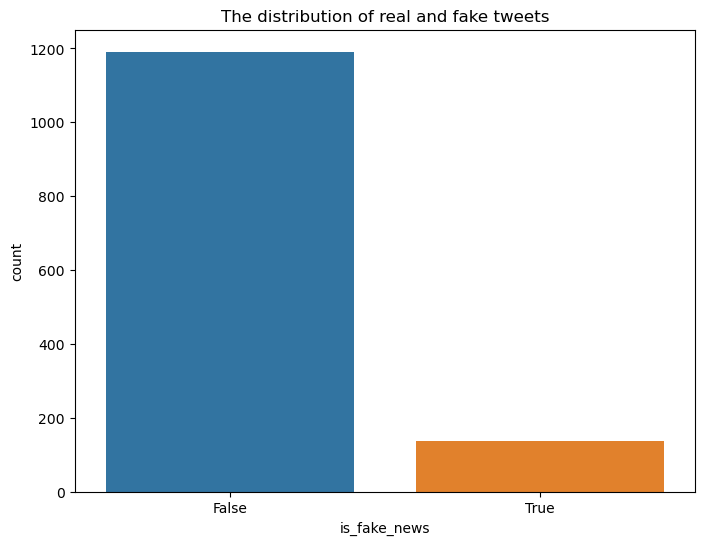

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='is_fake_news')
plt.title('The distribution of real and fake tweets')

## EDA

In [ ]:
print(df['text'][0])

@realDonaldTrump you are full of shit!


In [ ]:
# Preprocess the text data
def preprocess_text(text):
    # Clean the text
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.lower()
    text = re.sub(r'\b(ha)+\b', '', text)
    text = text.replace('\n', ' ')

    return text.strip()

def tokenize_column(df, column):
    # create an empty list to store the tokenized text
    tokenized = []

    # iterate over each row in the specified column
    for idx, row in df.iterrows():
        # tokenize the text in the specified column
        tokens = word_tokenize(row[column])

        # remove stopwords from the tokenized text
        filtered_tokens = [x for x in tokens if x not in stopwords.words('english')]

        # join the filtered tokens back into a single string and append to the tokenized list
        tokenized.append(' '.join(filtered_tokens))

    # add the tokenized text as a new column to the DataFrame
    df['tokenized'] = tokenized

    # return the modified DataFrame
    return df

df1 = df

df1['cleaned']=df1['text'].apply(preprocess_text)

df1 = tokenize_column(df1, 'cleaned')

df1[['text', 'is_fake_news', 'cleaned', 'tokenized']].head()


,text,is_fake_news,cleaned,tokenized
0,@realDonaldTrump you are full of shit!,False,realdonaldtrump you are full of shit,realdonaldtrump full shit
1,@realDonaldTrump you're fucking retarded,False,realdonaldtrump you re fucking retarded,realdonaldtrump fucking retarded
2,@realDonaldTrump You are the stupidest man on ...,False,realdonaldtrump you are the stupidest man on p...,realdonaldtrump stupidest man planet earth
3,@realDonaldTrump I am continually amazed and t...,False,realdonaldtrump i am continually amazed and te...,realdonaldtrump continually amazed terribly in...
4,Hey @realDonaldTrump You Mad Bro?,False,hey realdonaldtrump you mad bro,hey realdonaldtrump mad bro


In [ ]:
# Separate the features (tweets) and labels (true/false)
X = df1['tokenized']
y = df1['is_fake_news']

# Reshape X to a 2D array
X = X.values.reshape(-1, 1)

# Create an instance of the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Perform undersampling on the majority class
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Flatten the undersampled features to a 1D array
X_undersampled = np.squeeze(X_undersampled)

# Create a new DataFrame with the undersampled data
df_undersampled = pd.DataFrame({'tokenized': X_undersampled, 'is_fake_news': y_undersampled})


In [ ]:
df_undersampled.head()

,tokenized,is_fake_news
0,start electionday right healthy breakfast http...,False
1,hillaryclinton anyone women vote hillary https...,False
2,realdonaldtrump amp earlier motorcade en route...,False
3,realdonaldtrump great speech thus far getting ...,False
4,realdonaldtrump dedicated evenings rally riley...,False


Text(0.5, 1.0, 'The distribution of real and fake tweets after the balanced processing')

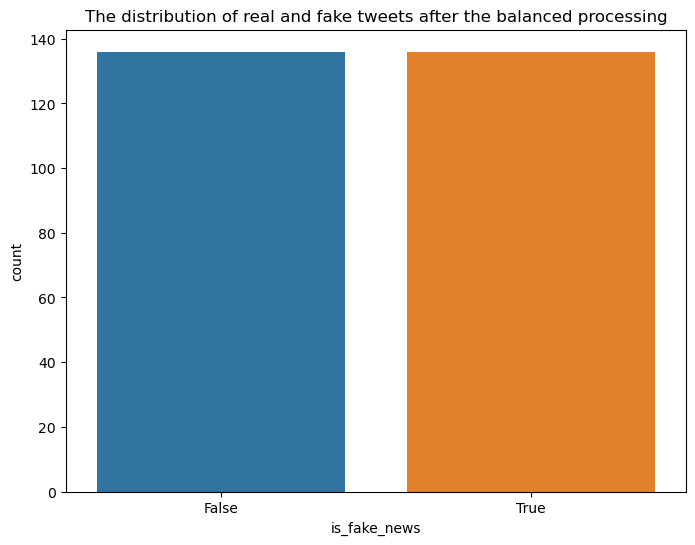

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_undersampled, x='is_fake_news')
plt.title('The distribution of real and fake tweets after the balanced processing')

### Verified Users

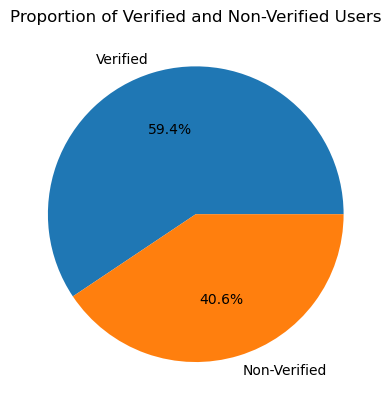

In [ ]:
labels = ['Verified', 'Non-Verified']
sizes = df['user_verified'].value_counts()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Verified and Non-Verified Users')
plt.show()

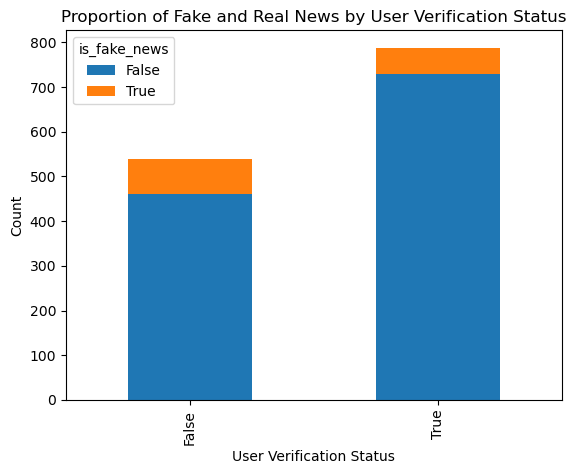

In [ ]:
# Group the data by 'user_verified' and 'unified_label' columns
grouped = df.groupby(['user_verified', 'is_fake_news']).size().unstack()

# Plotting the proportions
grouped.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('User Verification Status')
plt.ylabel('Count')
plt.title('Proportion of Fake and Real News by User Verification Status')

# Show the plot
plt.show()

### Statistics for retweets, favs, friends and followers

In [ ]:
# Group the data by 'unified_label' column and calculate statistics for each variable
stats_retweets = df.groupby('is_fake_news')['retweet_count'].describe()
stats_favorites = df.groupby('is_fake_news')['user_favourites_count'].describe()
stats_friends = df.groupby('is_fake_news')['user_friends_count'].describe()
stats_followers = df.groupby('is_fake_news')['user_followers_count'].describe()

# Create a list of tables for each variable
tables = []

# Append table for retweets
tables.append(['Retweets', tabulate(stats_retweets, headers='keys', tablefmt='fancy_grid')])

# Append table for favorites
tables.append(['Favorites', tabulate(stats_favorites, headers='keys', tablefmt='fancy_grid')])

# Append table for friends
tables.append(['Friends', tabulate(stats_friends, headers='keys', tablefmt='fancy_grid')])

# Append table for followers
tables.append(['Followers', tabulate(stats_followers, headers='keys', tablefmt='fancy_grid')])

# Print the tables
for table in tables:
    print(f"--- {table[0]} ---")
    print(table[1])
    print()

--- Retweets ---
╒════════════════╤═════════╤═════════╤═════════╤═══════╤═════════╤════════╤═══════╤═══════╕
│ is_fake_news   │   count │    mean │     std │   min │     25% │    50% │   75% │   max │
╞════════════════╪═════════╪═════════╪═════════╪═══════╪═════════╪════════╪═══════╪═══════╡
│ False          │    1191 │ 3601.73 │ 5021.66 │  1002 │ 1363.5  │ 2097   │  3719 │ 70137 │
├────────────────┼─────────┼─────────┼─────────┼───────┼─────────┼────────┼───────┼───────┤
│ True           │     136 │ 3910.11 │ 7354.31 │  1029 │ 1477.75 │ 2043.5 │  3854 │ 79092 │
╘════════════════╧═════════╧═════════╧═════════╧═══════╧═════════╧════════╧═══════╧═══════╛

--- Favorites ---
╒════════════════╤═════════╤═════════╤═════════╤═══════╤═══════╤════════╤═════════╤════════╕
│ is_fake_news   │   count │    mean │     std │   min │   25% │    50% │     75% │    max │
╞════════════════╪═════════╪═════════╪═════════╪═══════╪═══════╪════════╪═════════╪════════╡
│ False          │    1191 │ 11451.2 │ 28

### Wordclouds

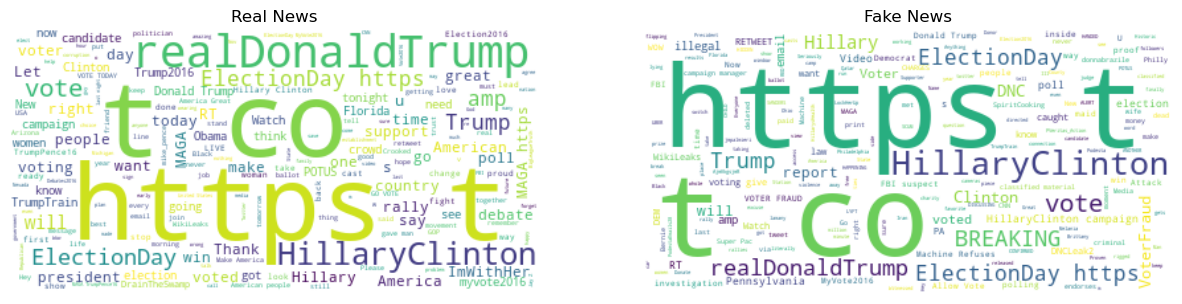

In [ ]:
# Combine all text from the 'text' column based on the 'is_fake_news' condition
fake_news_text = ' '.join(df[df['is_fake_news']]['text'])
real_news_text = ' '.join(df[~df['is_fake_news']]['text'])

real_news_wordcloud = WordCloud(background_color='white').generate(real_news_text)
fake_news_wordcloud = WordCloud(background_color='white').generate(fake_news_text)

plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
plt.imshow(real_news_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Real News')

plt.subplot(1, 2, 2)
plt.imshow(fake_news_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News')

plt.show()


### TOP 20 Most Common Words

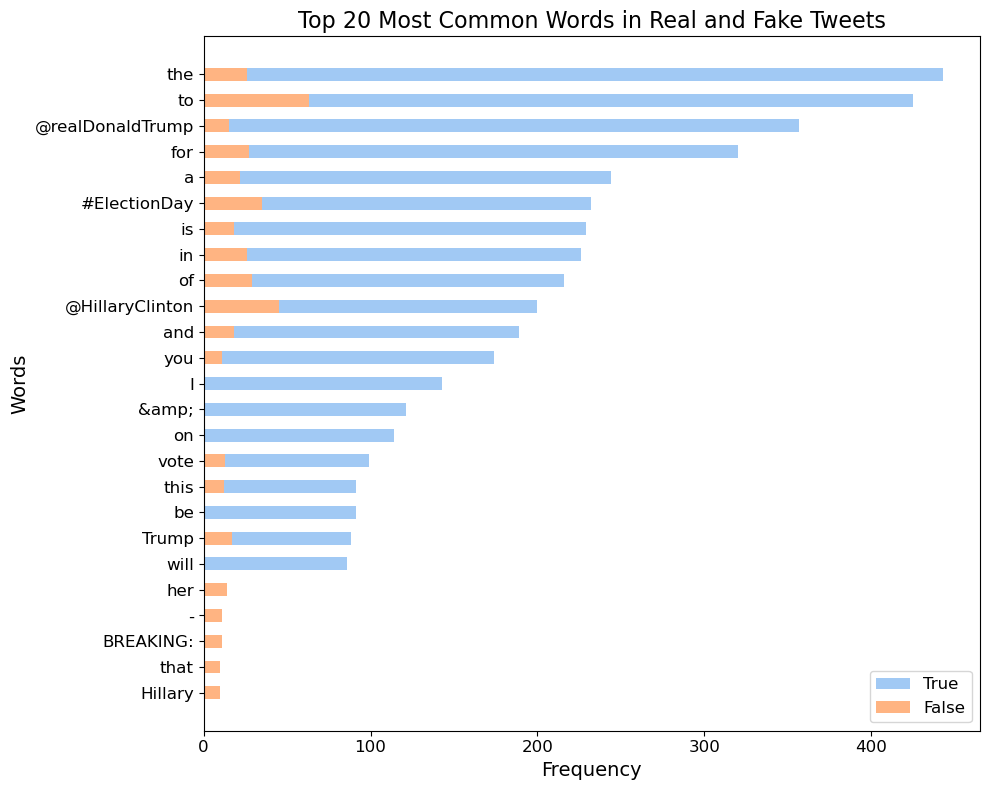

In [ ]:
colors = sns.color_palette('pastel', 2)

real_words = Counter(real_news_text.split()).most_common(20)
fake_words = Counter(fake_news_text.split()).most_common(20)

plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in real_words], [x[1] for x in real_words], height=0.5, color= colors[0], label='True')
plt.barh([x[0] for x in fake_words], [x[1] for x in fake_words], height=0.5, color= colors[1], label='False')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('Top 20 Most Common Words in Real and Fake Tweets', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Analisis of the text length

In [ ]:
df['tweet_length']=df['tokenized'].apply(lambda x: len(x))

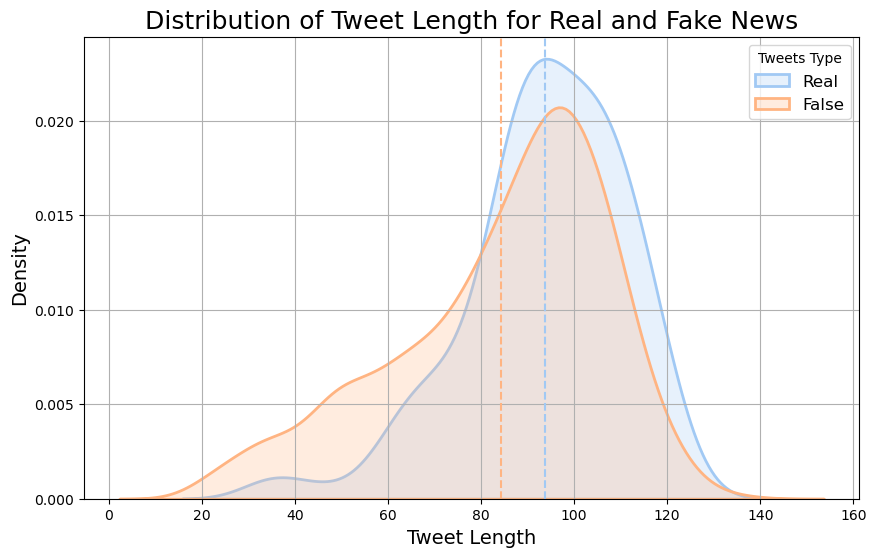

In [ ]:
colors = sns.color_palette('pastel', 2)
plt.figure(figsize=(10, 6))

fake_news_text = ' '.join(df[df['is_fake_news']]['text'])
real_news_text = ' '.join(df[~df['is_fake_news']]['text'])

sns.kdeplot(df[df['is_fake_news']]['tweet_length'], color= colors[0], fill=True, label='False', linewidth=2)
sns.kdeplot(df[~df['is_fake_news']]['tweet_length'], color= colors[1], fill=True, label='True', linewidth=2)
plt.axvline(df[df['is_fake_news']]['tweet_length'].mean(), color= colors[0], linestyle='--')
plt.axvline(df[~df['is_fake_news']]['tweet_length'].mean(), color= colors[1], linestyle='--')
plt.xlabel('Tweet Length', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Tweets Type', fontsize=12, labels=['Real', 'False'])
plt.title('Distribution of Tweet Length for Real and Fake News', fontsize=18)
plt.grid()
plt.show()

## Test/train partition and ML tecniques

In [ ]:
X3=df['tokenized']
y3=df['is_fake_news']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3 ,y3, test_size=0.20,stratify=y3, random_state = 777)

In [ ]:
def print_errors_report(df, X_test, y_test, y_pred):
    df = pd.DataFrame({'text': X_test, 'true_label': y_test, 'predicted_label': y_pred})
    misclassified_idx = df['true_label'] != df['predicted_label']
    misclassified = df[misclassified_idx]
    table = misclassified[['true_label', 'predicted_label', 'text']].reset_index(drop=True)
    table_styled = table.style.set_properties(**{'text-align': 'left'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}])
    print("Misclassified examples:")
    display(table_styled.data.head(20))

def run_model(dataset, model, X_train, y_train, X_test, y_test, param_grid, cv=5):
    # create a TfidfVectorizer object to convert text to numerical features
    tfidf = TfidfVectorizer()

    # convert text data to numerical features
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    # perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)
    grid_search.fit(X_train_tfidf, y_train)

    # use the best model to make predictions on the test data
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test_tfidf)

    # print the classification report
    print("=" * 50)
    print("Classification Report for", model.__class__.__name__)
    print("=" * 50)
    print(" " * 50)
    print(classification_report(y_test, y_pred))

    print(" " * 50)
    print(" " * 50)

    print("=" * 50)
    print("Best hyperparameters for", model.__class__.__name__)
    print("=" * 50)
    print(" " * 50)

    # print the best estimator and its score on the test data
    score = grid_search.best_score_
    accuracy = best_estimator.score(X_test_tfidf, y_test)
    print("Best hyperparameters:", grid_search.best_params_)
    print("Best score:",score)
    print("Accuracy on test set:", accuracy)

    print(" " * 50)
    print(" " * 50)

    print("=" * 50)
    print("Confusion matrix and ROC curve for", model.__class__.__name__)
    print("=" * 50)
    print(" " * 50)

    # create a confusion matrix and plot it in the first subplot
    cm = confusion_matrix(y_test, y_pred)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    np.set_printoptions(suppress=True)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap="Blues", ax=ax1)
    ax1.set_xlabel("Predicted Labels")
    ax1.set_ylabel("True Labels")
    ax1.set_title("Confusion Matrix")

    # plot the ROC curve in the second subplot
    RocCurveDisplay.from_estimator(best_estimator, X_test_tfidf, y_test, ax=ax2)
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')

    # adjust the layout and show the figure
    plt.tight_layout()
    plt.show()

    print(" " * 50)
    print(" " * 50)

    print("=" * 50)
    print("Misclassified examples for", model.__class__.__name__)
    print("=" * 50)
    print(" " * 50)

    print_errors_report(dataset, X_test, y_test, y_pred)

    print(" " * 50)
    print(" " * 50)

    return accuracy, y_pred, best_estimator

### SVM

In [ ]:
# define the SVM classifier
svm = SVC()

param_grid = {'kernel': ['linear', 'rbf'],
              'C': [0.1, 1, 10],
              'gamma': [0.1, 1],
              'class_weight': [None, 'balanced']}

# train and evaluate the model
accuracy_svm, y_pred_svm, svm = run_model(df, svm, X_train, y_train, X_test, y_test, param_grid)

### MultinomialNB

Classification Report for MultinomialNB
                                                  
              precision    recall  f1-score   support

       False       0.90      1.00      0.95       239
        True       0.00      0.00      0.00        27

    accuracy                           0.90       266
   macro avg       0.45      0.50      0.47       266
weighted avg       0.81      0.90      0.85       266

                                                  
                                                  
Best hyperparameters for MultinomialNB
                                                  
Best hyperparameters: {'alpha': 1, 'class_prior': None, 'fit_prior': True}
Best score: 0.8972672513065817
Accuracy on test set: 0.8984962406015038
                                                  
                                                  
Confusion matrix and ROC curve for MultinomialNB
                                                  


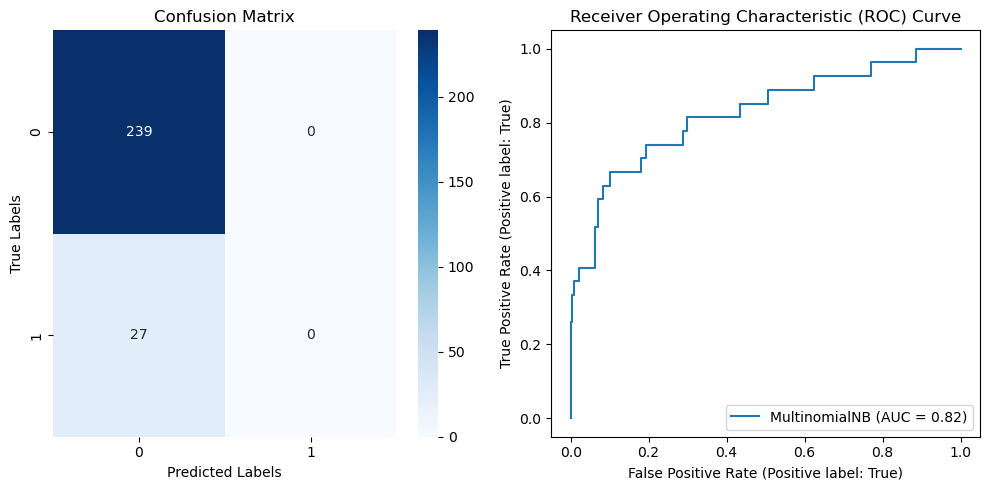

                                                  
                                                  
Misclassified examples for MultinomialNB
                                                  
Misclassified examples:


,true_label,predicted_label,text
0,True,False,breaking major hillaryclinton donor inside dem...
1,True,False,illegal arrest ice agents attempting vote dade...
2,True,False,drewgriffincnn coordinate donnabrazile amp hil...
3,True,False,realdonaldtrump mike pence midnight rally mich...
4,True,False,breaking hillaryclinton staggers car tonight u...
5,True,False,art biljana djurdjevic favorite tony podesta b...
6,True,False,breaking historic moment fbi suspect casts vot...
7,True,False,electionday gets vote vote amp retweet amp vis...
8,True,False,watch hillaryclinton lawyer tell staffers brea...
9,True,False,alert everyone make sure vote placed accuratel...


In [ ]:
# define the MultinomialNB classifier
nb = MultinomialNB()

param_grid = {'alpha': [0.1, 1, 10],
              'fit_prior': [True, False],
              'class_prior': [None, [0.3, 0.7], [0.4, 0.6]]}


# train and evaluate the model
accuracy_nb, y_pred_nb, nb = run_model(df, nb, X_train, y_train, X_test, y_test,param_grid)

### RandomForestClassifier

Classification Report for RandomForestClassifier
                                                  
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       239
        True       0.88      0.26      0.40        27

    accuracy                           0.92       266
   macro avg       0.90      0.63      0.68       266
weighted avg       0.92      0.92      0.90       266

                                                  
                                                  
Best hyperparameters for RandomForestClassifier
                                                  
Best hyperparameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.910470369386128
Accuracy on test set: 0.9210526315789473
                                                  
                                                  
Confusion matrix and ROC curve for RandomForestClassifier
              

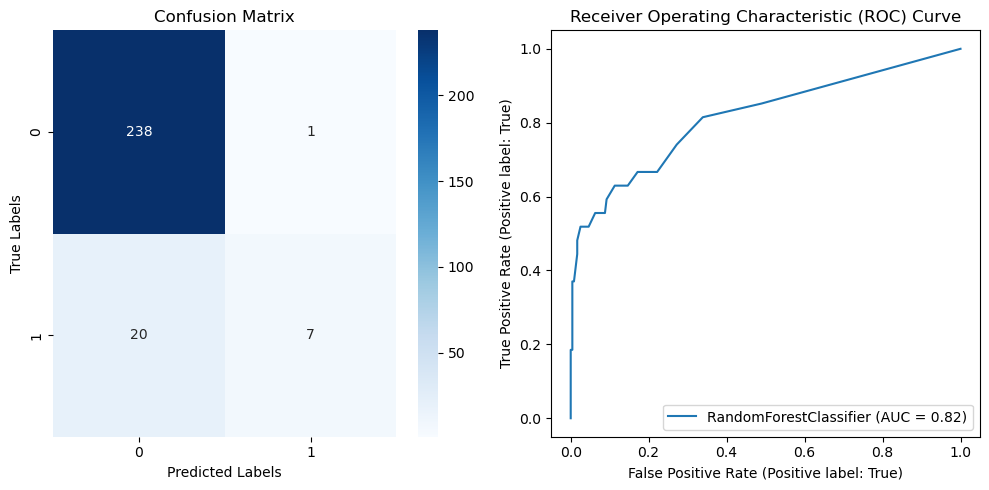

                                                  
                                                  
Misclassified examples for RandomForestClassifier
                                                  
Misclassified examples:


,true_label,predicted_label,text
0,True,False,breaking major hillaryclinton donor inside dem...
1,False,True,breaking news fbi opening investigation hillar...
2,True,False,illegal arrest ice agents attempting vote dade...
3,True,False,drewgriffincnn coordinate donnabrazile amp hil...
4,True,False,realdonaldtrump mike pence midnight rally mich...
5,True,False,breaking hillaryclinton staggers car tonight u...
6,True,False,art biljana djurdjevic favorite tony podesta b...
7,True,False,electionday gets vote vote amp retweet amp vis...
8,True,False,watch hillaryclinton lawyer tell staffers brea...
9,True,False,alert everyone make sure vote placed accuratel...


In [ ]:
# create a Random Forest object
rf = RandomForestClassifier(random_state=777)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 6],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# train and evaluate the model
accuracy_rf, y_pred_rf, rf = run_model(df, rf, X_train, y_train, X_test, y_test, param_grid)

### LogisticRegression

Classification Report for LogisticRegression
                                                  
              precision    recall  f1-score   support

       False       0.94      0.97      0.95       239
        True       0.63      0.44      0.52        27

    accuracy                           0.92       266
   macro avg       0.79      0.71      0.74       266
weighted avg       0.91      0.92      0.91       266

                                                  
                                                  
Best hyperparameters for LogisticRegression
                                                  
Best hyperparameters: {'C': 1, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001}
Best score: 0.9189432190628045
Accuracy on test set: 0.9172932330827067
                                                  
                                                  
Confusion matrix and ROC curve for LogisticRegression

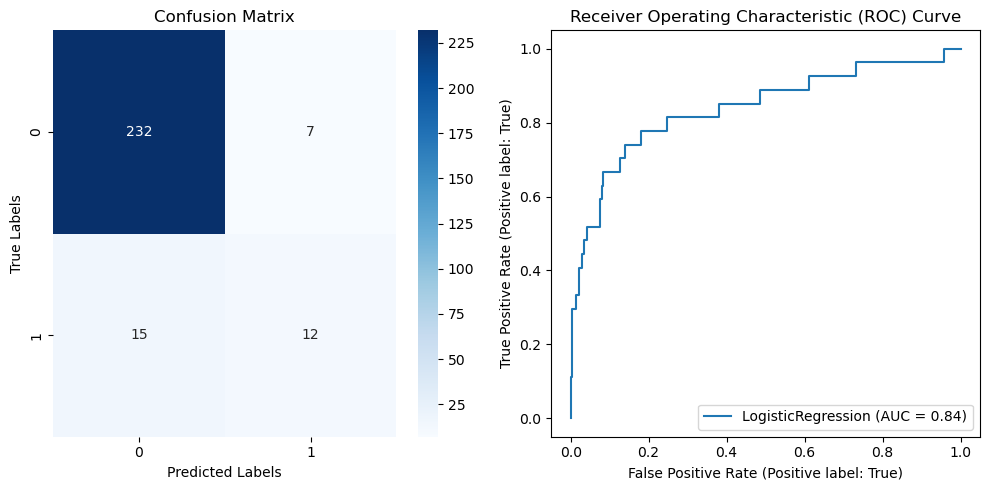

                                                  
                                                  
Misclassified examples for LogisticRegression
                                                  
Misclassified examples:


,true_label,predicted_label,text
0,False,True,breaking news fbi opening investigation hillar...
1,True,False,illegal arrest ice agents attempting vote dade...
2,True,False,realdonaldtrump mike pence midnight rally mich...
3,False,True,give money back hillaryclinton draintheswamp h...
4,True,False,electionday gets vote vote amp retweet amp vis...
5,True,False,watch hillaryclinton lawyer tell staffers brea...
6,True,False,alert everyone make sure vote placed accuratel...
7,True,False,podestaemails ever doubts whether facebook pro...
8,True,False,mayor giuliani clinton maid access top secret ...
9,False,True,retweet agree w hillaryclinton http co cjmovmy...


In [ ]:
# create a Logistic Regression object
lr = LogisticRegression()

param_grid = {
    'C': [0.1, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 500],
    'tol': [1e-3, 1e-4]
}

# train and evaluate the model
accuracy_lr, y_pred_lr, lr = run_model(df, lr, X_train, y_train, X_test, y_test, param_grid)

### GradientBoostingClassifier

Classification Report for GradientBoostingClassifier
                                                  
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       239
        True       0.80      0.15      0.25        27

    accuracy                           0.91       266
   macro avg       0.86      0.57      0.60       266
weighted avg       0.90      0.91      0.88       266

                                                  
                                                  
Best hyperparameters for GradientBoostingClassifier
                                                  
Best hyperparameters: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'n_estimators': 100}
Best score: 0.9057445300735228
Accuracy on test set: 0.9097744360902256
                                                  
                                                  
Confusion matrix and ROC curve for GradientBoostingClassifier
                       

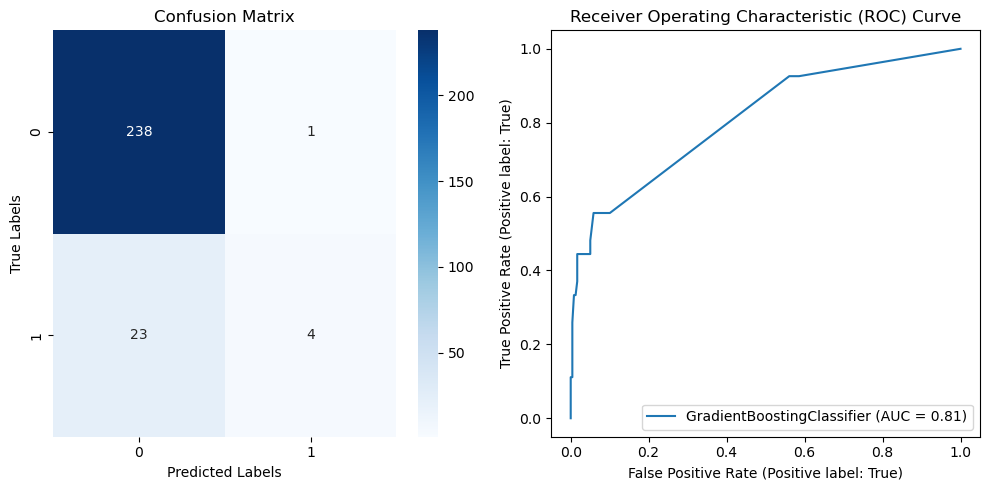

                                                  
                                                  
Misclassified examples for GradientBoostingClassifier
                                                  
Misclassified examples:


,true_label,predicted_label,text
0,True,False,breaking major hillaryclinton donor inside dem...
1,False,True,breaking news fbi opening investigation hillar...
2,True,False,illegal arrest ice agents attempting vote dade...
3,True,False,drewgriffincnn coordinate donnabrazile amp hil...
4,True,False,realdonaldtrump mike pence midnight rally mich...
5,True,False,breaking hillaryclinton staggers car tonight u...
6,True,False,art biljana djurdjevic favorite tony podesta b...
7,True,False,electionday gets vote vote amp retweet amp vis...
8,True,False,watch hillaryclinton lawyer tell staffers brea...
9,True,False,alert everyone make sure vote placed accuratel...


In [ ]:
# define the Gradient Boosting classifier object
gb = GradientBoostingClassifier(random_state=777)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'loss': ['log_loss', 'exponential']
}

# train and evaluate the model
accuracy_gb, y_pred_gb, gb = run_model(df, gb, X_train, y_train, X_test, y_test, param_grid)

### KNeighborsClassifier

Classification Report for KNeighborsClassifier
                                                  
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       239
        True       0.80      0.15      0.25        27

    accuracy                           0.91       266
   macro avg       0.86      0.57      0.60       266
weighted avg       0.90      0.91      0.88       266

                                                  
                                                  
Best hyperparameters for KNeighborsClassifier
                                                  
Best hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best score: 0.9180086810169191
Accuracy on test set: 0.9097744360902256
                                                  
                                                  
Confusion matrix and ROC curve for KNeighborsClassifier
              

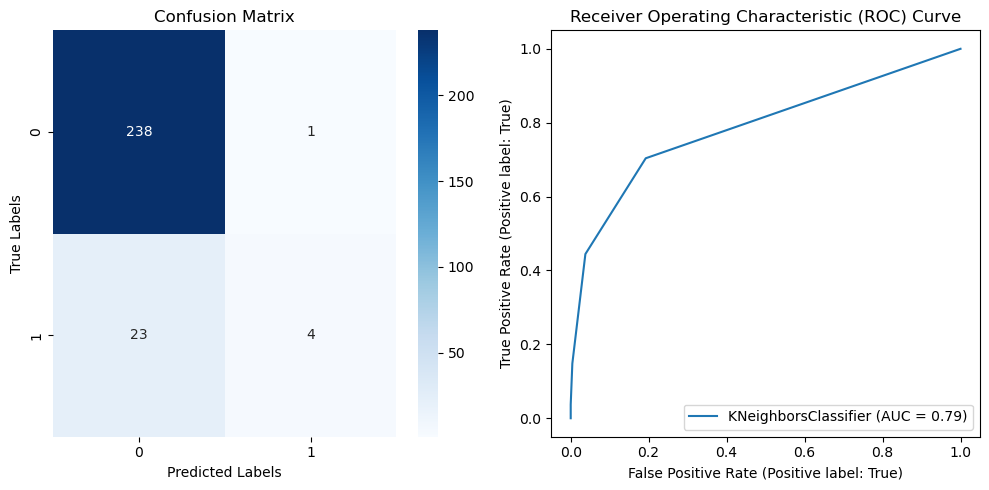

                                                  
                                                  
Misclassified examples for KNeighborsClassifier
                                                  
Misclassified examples:


,true_label,predicted_label,text
0,True,False,breaking major hillaryclinton donor inside dem...
1,True,False,illegal arrest ice agents attempting vote dade...
2,True,False,drewgriffincnn coordinate donnabrazile amp hil...
3,True,False,realdonaldtrump mike pence midnight rally mich...
4,False,True,give money back hillaryclinton draintheswamp h...
5,True,False,breaking hillaryclinton staggers car tonight u...
6,True,False,breaking historic moment fbi suspect casts vot...
7,True,False,electionday gets vote vote amp retweet amp vis...
8,True,False,watch hillaryclinton lawyer tell staffers brea...
9,True,False,alert everyone make sure vote placed accuratel...


In [ ]:
# create a KNN object
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5],
              'weights': ['uniform', 'distance'],
              'p': [1, 2],
              'algorithm': ['auto', 'ball_tree'],
              'leaf_size': [10, 20],
              'metric': ['minkowski', 'cosine']}

# train and evaluate the model
accuracy_knn, y_pred_knn, knn = run_model(df, knn, X_train, y_train, X_test, y_test, param_grid)

### Pasive Agressive Classifier

Classification Report for PassiveAggressiveClassifier
                                                  
              precision    recall  f1-score   support

       False       0.93      0.99      0.96       239
        True       0.73      0.30      0.42        27

    accuracy                           0.92       266
   macro avg       0.83      0.64      0.69       266
weighted avg       0.91      0.92      0.90       266

                                                  
                                                  
Best hyperparameters for PassiveAggressiveClassifier
                                                  
Best hyperparameters: {'C': 0.001, 'early_stopping': False, 'fit_intercept': False, 'loss': 'hinge', 'max_iter': 10000, 'shuffle': True, 'tol': 1e-05, 'validation_fraction': 0.1}
Best score: 0.9255469926477102
Accuracy on test set: 0.9172932330827067
                                                  
                                                  
Confusion

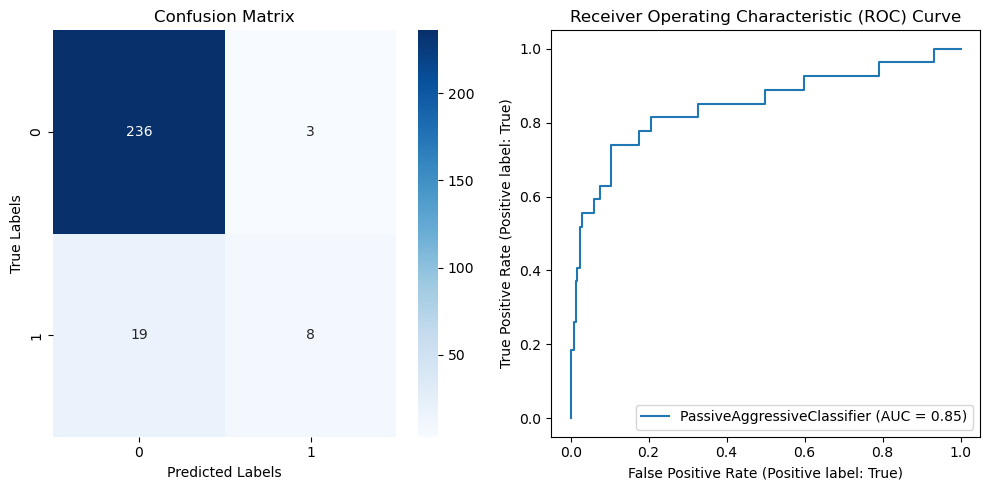

                                                  
                                                  
Misclassified examples for PassiveAggressiveClassifier
                                                  
Misclassified examples:


,true_label,predicted_label,text
0,False,True,breaking news fbi opening investigation hillar...
1,True,False,illegal arrest ice agents attempting vote dade...
2,False,True,saving america everyone florida panhandle vote...
3,True,False,realdonaldtrump mike pence midnight rally mich...
4,True,False,breaking hillaryclinton staggers car tonight u...
5,True,False,art biljana djurdjevic favorite tony podesta b...
6,True,False,electionday gets vote vote amp retweet amp vis...
7,True,False,watch hillaryclinton lawyer tell staffers brea...
8,True,False,alert everyone make sure vote placed accuratel...
9,True,False,podestaemails ever doubts whether facebook pro...


In [ ]:
# Create a PassiveAggressiveClassifier model
pac = PassiveAggressiveClassifier()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [100, 1000, 10000],
    'tol': [1e-4, 1e-5],
    'fit_intercept': [True, False],
    'shuffle': [True, False],
    'loss': ['hinge', 'squared_hinge'],
    'early_stopping': [True, False],
    'validation_fraction': [0.1, 0.2],
}

# train and evaluate the model
accuracy_pac, y_pred_pac, pac = run_model(df, pac, X_train, y_train, X_test, y_test,param_grid)

### Results

In [ ]:
results_dict = {'SVM': {'accuracy': accuracy_svm},
'Random Forest': {'accuracy': accuracy_rf},
'Naive Bayes': {'accuracy': accuracy_nb},
'Logistic Regression': {'accuracy': accuracy_lr},
'Gradient Boosting': {'accuracy': accuracy_gb},
'K-Nearest Neighbors': {'accuracy': accuracy_knn},
'Passive Agressive clasifier': {'accuracy': accuracy_pac}}

results_df = pd.DataFrame(results_dict).transpose().sort_values('accuracy', ascending=False)

display(HTML(results_df.to_html()))

,accuracy
Random Forest,0.921053
Logistic Regression,0.917293
Passive Agressive clasifier,0.917293
SVM,0.909774
Gradient Boosting,0.909774
K-Nearest Neighbors,0.909774
Naive Bayes,0.898496


## Attention models

In [ ]:
 df['is_fake_news']

0       False
1       False
2       False
3       False
4       False
        ...  
1322    False
1323    False
1324    False
1325    False
1326    False
Name: is_fake_news, Length: 1327, dtype: bool

In [ ]:
sentences = df['tokenized'].astype(str).str.lower().values.tolist()
labels = df['is_fake_news'].values.tolist()
labels = np.array([1 if label == False else 0 for label in labels])

# Shuffle the sentences and labels together
shuffled_sentences, shuffled_labels = shuffle(sentences, labels, random_state=42)

len(sentences)

1327

In [ ]:
# Split the data into train and test sets, maintaining the class proportions
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(
    shuffled_sentences, shuffled_labels, test_size=0.2, stratify=shuffled_labels, random_state=42
)

# Check the lengths of the train and test sets
print("Train set length:", len(training_sentences))
print("Test set length:", len(testing_sentences))

Train set length: 1061
Test set length: 266


In [ ]:
#Hyper parameters

vocab_size = 10000
embedding_dim = 100
max_length = 150
trunc_type='pre'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
print('The total words are ', len(word_index))

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

The total words are  4471


In [ ]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

### LSTM

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

2023-06-25 00:03:42.780381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-25 00:03:42.788623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-25 00:03:42.792247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 bidirectional_20 (Bidirecti  (None, 150, 64)          34048     
 onal)                                                           
                                                                 
 bidirectional_21 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dropout_152 (Dropout)       (None, 64)                0         
                                                                 
 dense_56 (Dense)            (None, 24)                1560      
                                                                 
 dropout_153 (Dropout)       (None, 24)              

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30


2023-06-25 00:03:47.815100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-25 00:03:47.827546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-25 00:03:47.831386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

34/34 - 43s - loss: 0.4364 - accuracy: 0.8850 - val_loss: 0.3235 - val_accuracy: 0.8985 - 43s/epoch - 1s/step
Epoch 2/30
34/34 - 9s - loss: 0.3268 - accuracy: 0.8973 - val_loss: 0.2943 - val_accuracy: 0.8985 - 9s/epoch - 274ms/step
Epoch 3/30
34/34 - 8s - loss: 0.1494 - accuracy: 0.9434 - val_loss: 0.3546 - val_accuracy: 0.9060 - 8s/epoch - 221ms/step
Epoch 4/30
34/34 - 6s - loss: 0.0408 - accuracy: 0.9887 - val_loss: 0.3616 - val_accuracy: 0.9211 - 6s/epoch - 187ms/step
Epoch 5/30
34/34 - 8s - loss: 0.0083 - accuracy: 0.9991 - val_loss: 0.4011 - val_accuracy: 0.9135 - 8s/epoch - 222ms/step
Epoch 6/30
34/34 - 7s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.5128 - val_accuracy: 0.9173 - 7s/epoch - 206ms/step
Epoch 7/30
34/34 - 7s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5658 - val_accuracy: 0.9173 - 7s/epoch - 218ms/step
Epoch 8/30
34/34 - 7s - loss: 8.3545e-04 - accuracy: 1.0000 - val_loss: 0.6108 - val_accuracy: 0.9211 - 7s/epoch - 203ms/step
Epoch 9/30
34/34 - 7s - loss: 4.

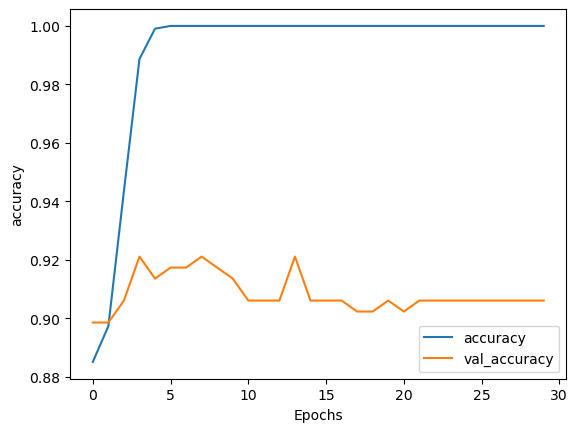

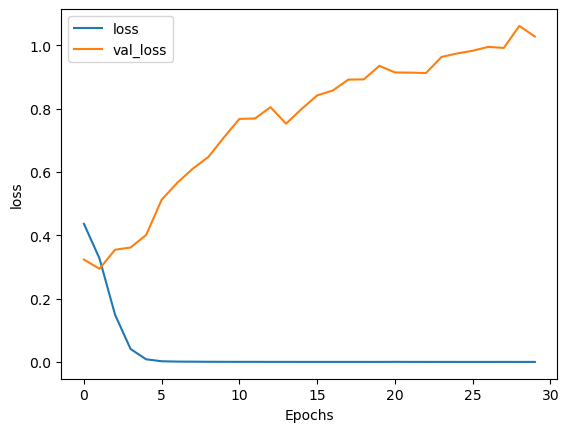

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
lstm_loss, lstm_acc = model.evaluate(testing_padded, testing_labels)

9/9 [==============================] - 0s 43ms/step - loss: 1.0283 - accuracy: 0.9060


### CNN

In [ ]:
model_CNN = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_CNN.summary())

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 conv1d_5 (Conv1D)           (None, 146, 128)          64128     
                                                                 
 global_max_pooling1d_5 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dropout_154 (Dropout)       (None, 64)                0         
                                                                 
 dense_59 (Dense)            (None, 1)                 65        
                                                     

In [ ]:
num_epochs = 30
history = model_CNN.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
34/34 - 25s - loss: 0.4059 - accuracy: 0.8935 - val_loss: 0.3361 - val_accuracy: 0.8985 - 25s/epoch - 723ms/step
Epoch 2/30
34/34 - 2s - loss: 0.3325 - accuracy: 0.8973 - val_loss: 0.3247 - val_accuracy: 0.8985 - 2s/epoch - 54ms/step
Epoch 3/30
34/34 - 2s - loss: 0.2983 - accuracy: 0.8973 - val_loss: 0.3109 - val_accuracy: 0.8985 - 2s/epoch - 57ms/step
Epoch 4/30
34/34 - 2s - loss: 0.2054 - accuracy: 0.8982 - val_loss: 0.2712 - val_accuracy: 0.8985 - 2s/epoch - 56ms/step
Epoch 5/30
34/34 - 2s - loss: 0.0925 - accuracy: 0.9708 - val_loss: 0.3185 - val_accuracy: 0.9023 - 2s/epoch - 46ms/step
Epoch 6/30
34/34 - 2s - loss: 0.0414 - accuracy: 1.0000 - val_loss: 0.3066 - val_accuracy: 0.9023 - 2s/epoch - 46ms/step
Epoch 7/30
34/34 - 2s - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.3231 - val_accuracy: 0.8985 - 2s/epoch - 46ms/step
Epoch 8/30
34/34 - 1s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3529 - val_accuracy: 0.8985 - 1s/epoch - 38ms/step
Epoch 9/30
34/34 - 1s - loss:

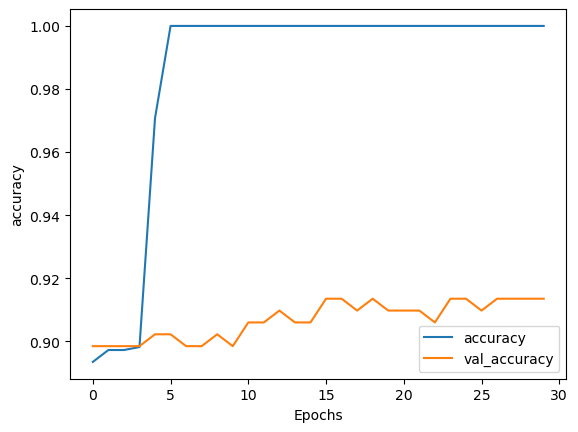

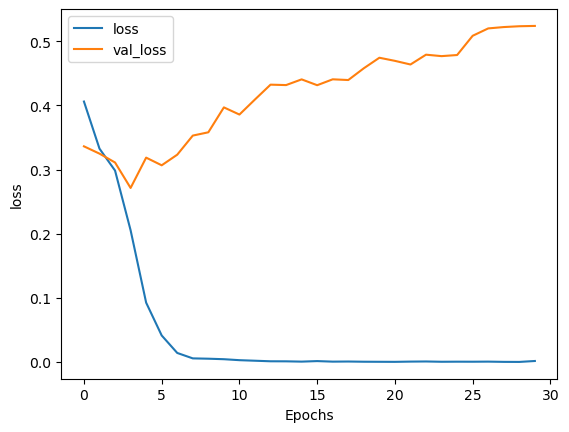

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
cnn_loss, cnn_acc = model_CNN.evaluate(testing_padded, testing_labels)

9/9 [==============================] - 0s 9ms/step - loss: 0.5237 - accuracy: 0.9135


9/9 [==============================] - 0s 9ms/step


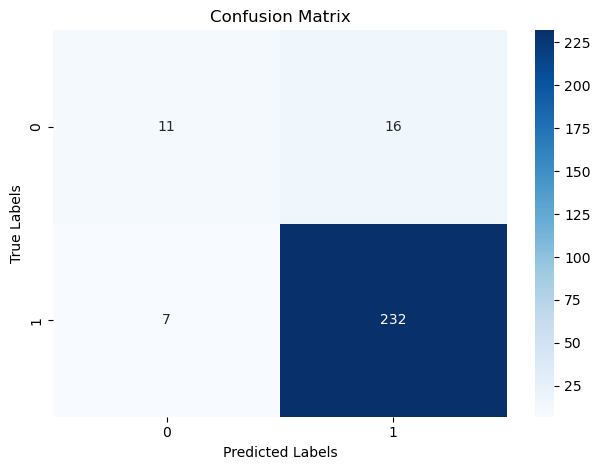

In [ ]:
predicted_probabilities = model_CNN.predict(testing_padded)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(testing_labels, predicted_labels)

# Create a heatmap of the confusion matrix
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and adjust layout
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
plt.tight_layout()

# Display the plot
plt.show()

9/9 [==============================] - 0s 10ms/step


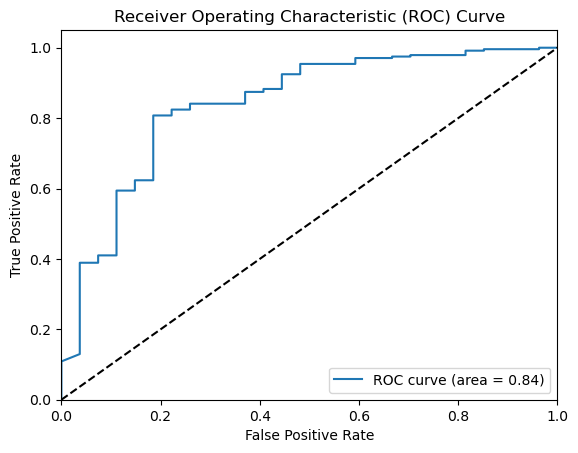

In [ ]:
predicted_probabilities = model_CNN.predict(testing_padded)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testing_labels, predicted_probabilities)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot a diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### MLP

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_5 (Flatten)         (None, 15000)             0         
                                                                 
 dense_60 (Dense)            (None, 64)                960064    
                                                                 
 dropout_155 (Dropout)       (None, 64)                0         
                                                                 
 dense_61 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,960,129
Trainable params: 1,960,129
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
34/34 - 3s - loss: 0.3678 - accuracy: 0.8831 - val_loss: 0.3321 - val_accuracy: 0.8985 - 3s/epoch - 92ms/step
Epoch 2/30
34/34 - 1s - loss: 0.3301 - accuracy: 0.8973 - val_loss: 0.3183 - val_accuracy: 0.8985 - 631ms/epoch - 19ms/step
Epoch 3/30
34/34 - 1s - loss: 0.2768 - accuracy: 0.8973 - val_loss: 0.2978 - val_accuracy: 0.8985 - 588ms/epoch - 17ms/step
Epoch 4/30
34/34 - 1s - loss: 0.1763 - accuracy: 0.8973 - val_loss: 0.2880 - val_accuracy: 0.8985 - 587ms/epoch - 17ms/step
Epoch 5/30
34/34 - 1s - loss: 0.1127 - accuracy: 0.9020 - val_loss: 0.2772 - val_accuracy: 0.8985 - 576ms/epoch - 17ms/step
Epoch 6/30
34/34 - 1s - loss: 0.0857 - accuracy: 0.9764 - val_loss: 0.3036 - val_accuracy: 0.9023 - 598ms/epoch - 18ms/step
Epoch 7/30
34/34 - 1s - loss: 0.0766 - accuracy: 0.9906 - val_loss: 0.3297 - val_accuracy: 0.9023 - 581ms/epoch - 17ms/step
Epoch 8/30
34/34 - 1s - loss: 0.0726 - accuracy: 0.9943 - val_loss: 0.3352 - val_accuracy: 0.9023 - 572ms/epoch - 17ms/step
Epoch 9/30


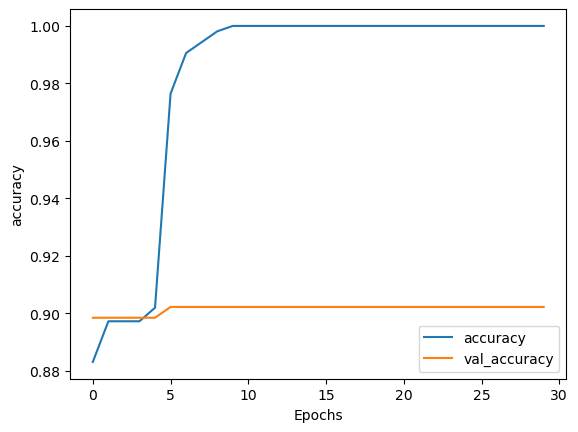

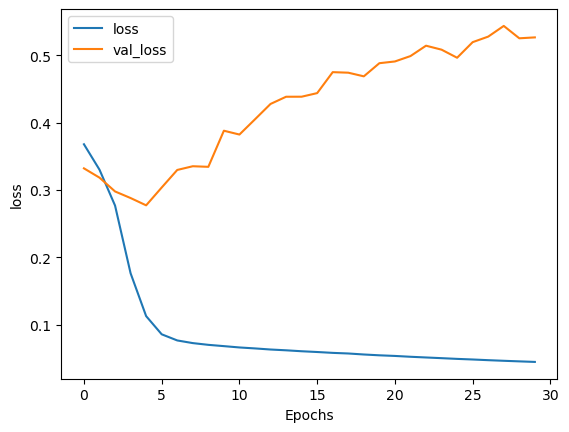

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
mlp_loss, mlp_acc =model.evaluate(testing_padded, testing_labels)

9/9 [==============================] - 0s 8ms/step - loss: 0.5265 - accuracy: 0.9023


9/9 [==============================] - 0s 3ms/step


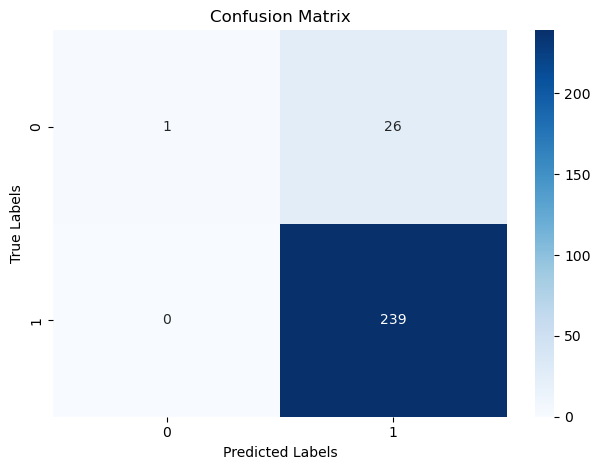

In [ ]:
predicted_probabilities = model.predict(testing_padded)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(testing_labels, predicted_labels)

# Create a heatmap of the confusion matrix
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and adjust layout
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
plt.tight_layout()

# Display the plot
plt.show()

9/9 [==============================] - 0s 13ms/step


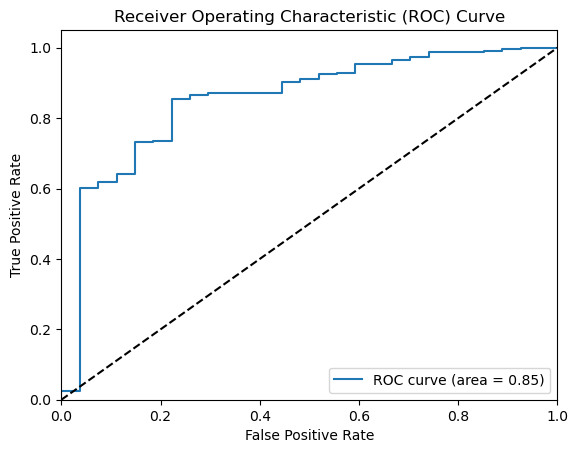

In [ ]:
predicted_probabilities = model.predict(testing_padded)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testing_labels, predicted_probabilities)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot a diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### BiLSTM

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

2023-06-25 00:09:34.671593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-25 00:09:34.677378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-25 00:09:34.681619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 bidirectional_22 (Bidirecti  (None, 150, 64)          34048     
 onal)                                                           
                                                                 
 bidirectional_23 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dropout_156 (Dropout)       (None, 64)                0         
                                                                 
 dense_62 (Dense)            (None, 24)                1560      
                                                                 
 dropout_157 (Dropout)       (None, 24)              

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30


2023-06-25 00:09:38.272164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-25 00:09:38.277951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-25 00:09:38.281456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

34/34 - 42s - loss: 0.4816 - accuracy: 0.8699 - val_loss: 0.3296 - val_accuracy: 0.8985 - 42s/epoch - 1s/step
Epoch 2/30
34/34 - 7s - loss: 0.3334 - accuracy: 0.8973 - val_loss: 0.3163 - val_accuracy: 0.8985 - 7s/epoch - 202ms/step
Epoch 3/30
34/34 - 7s - loss: 0.2510 - accuracy: 0.8992 - val_loss: 0.2590 - val_accuracy: 0.8985 - 7s/epoch - 202ms/step
Epoch 4/30
34/34 - 7s - loss: 0.0841 - accuracy: 0.9793 - val_loss: 0.3033 - val_accuracy: 0.9098 - 7s/epoch - 206ms/step
Epoch 5/30
34/34 - 7s - loss: 0.0185 - accuracy: 0.9962 - val_loss: 0.3595 - val_accuracy: 0.8985 - 7s/epoch - 204ms/step
Epoch 6/30
34/34 - 7s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.4444 - val_accuracy: 0.9098 - 7s/epoch - 198ms/step
Epoch 7/30
34/34 - 6s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4947 - val_accuracy: 0.9098 - 6s/epoch - 189ms/step
Epoch 8/30
34/34 - 7s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.5358 - val_accuracy: 0.9135 - 7s/epoch - 194ms/step
Epoch 9/30
34/34 - 7s - loss: 0.0015

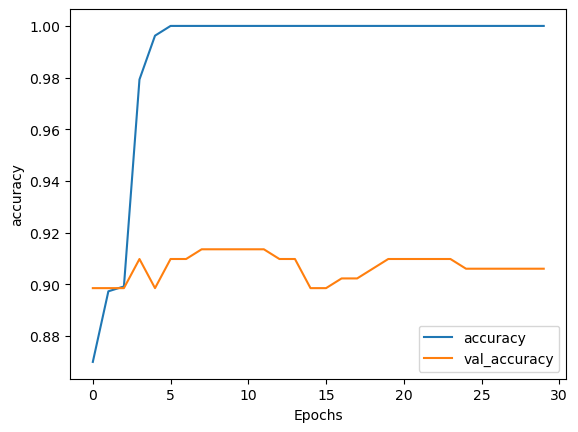

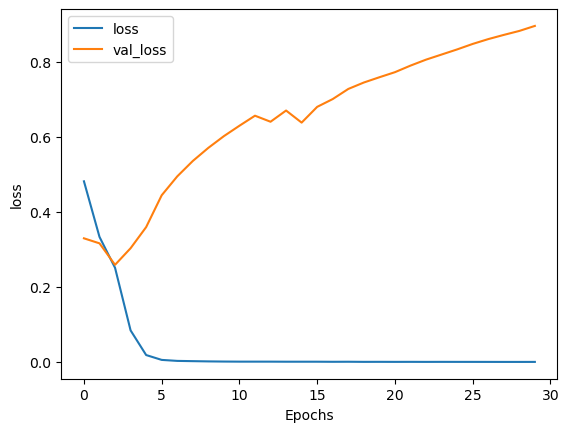

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
bilstm_loss, bilstm_acc = model.evaluate(testing_padded, testing_labels)

9/9 [==============================] - 0s 38ms/step - loss: 0.8959 - accuracy: 0.9060


2023-06-25 00:13:50.308777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-25 00:13:50.312881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-25 00:13:50.317996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 5s 47ms/step


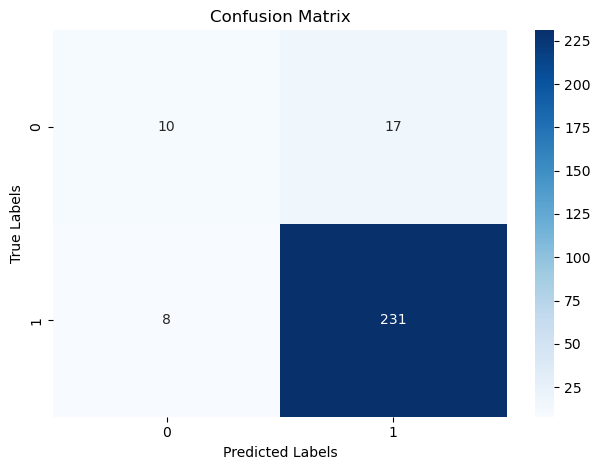

In [ ]:
predicted_probabilities = model.predict(testing_padded)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(testing_labels, predicted_labels)

# Create a heatmap of the confusion matrix
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and adjust layout
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
plt.tight_layout()

# Display the plot
plt.show()

9/9 [==============================] - 0s 41ms/step


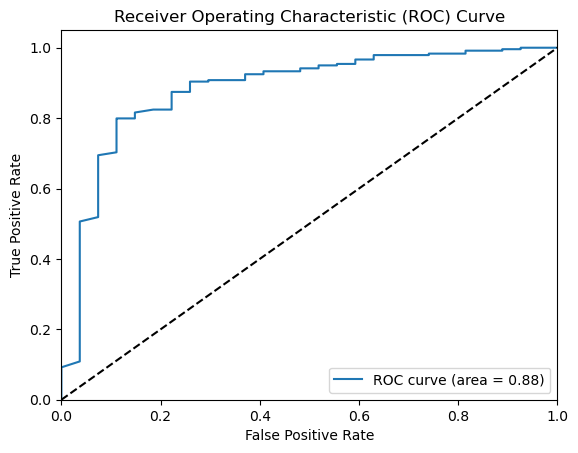

In [ ]:
predicted_probabilities = model.predict(testing_padded)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testing_labels, predicted_probabilities)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot a diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### RNN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 150, 64)           10560     
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 64)                8256      
                                                                 
 dense_64 (Dense)            (None, 64)                4160      
                                                                 
 dropout_158 (Dropout)       (None, 64)                0         
                                                                 
 dense_65 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,023,041
Trainable params: 1,023,041
N

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
34/34 - 11s - loss: 0.3948 - accuracy: 0.8831 - val_loss: 0.3359 - val_accuracy: 0.8985 - 11s/epoch - 325ms/step
Epoch 2/30
34/34 - 3s - loss: 0.3453 - accuracy: 0.8973 - val_loss: 0.3329 - val_accuracy: 0.8985 - 3s/epoch - 96ms/step
Epoch 3/30
34/34 - 4s - loss: 0.3501 - accuracy: 0.8973 - val_loss: 0.3284 - val_accuracy: 0.8985 - 4s/epoch - 108ms/step
Epoch 4/30
34/34 - 3s - loss: 0.3526 - accuracy: 0.8973 - val_loss: 0.3307 - val_accuracy: 0.8985 - 3s/epoch - 98ms/step
Epoch 5/30
34/34 - 3s - loss: 0.3514 - accuracy: 0.8973 - val_loss: 0.3303 - val_accuracy: 0.8985 - 3s/epoch - 103ms/step
Epoch 6/30
34/34 - 4s - loss: 0.3485 - accuracy: 0.8973 - val_loss: 0.3314 - val_accuracy: 0.8985 - 4s/epoch - 104ms/step
Epoch 7/30
34/34 - 3s - loss: 0.3498 - accuracy: 0.8973 - val_loss: 0.3305 - val_accuracy: 0.8985 - 3s/epoch - 101ms/step
Epoch 8/30
34/34 - 3s - loss: 0.3484 - accuracy: 0.8973 - val_loss: 0.3312 - val_accuracy: 0.8985 - 3s/epoch - 92ms/step
Epoch 9/30
34/34 - 3s - l

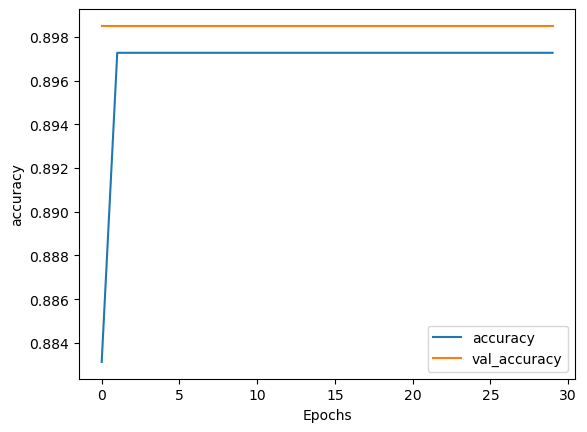

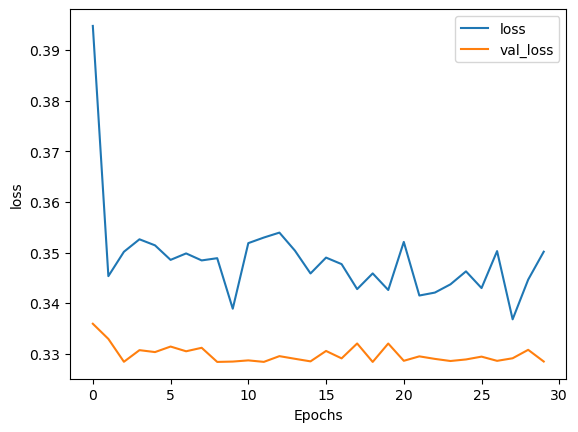

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
rnn_loss, rnn_acc = model.evaluate(testing_padded, testing_labels)

9/9 [==============================] - 0s 22ms/step - loss: 0.3285 - accuracy: 0.8985


### Results

In [ ]:
results_dict = {'LSTM': {'accuracy': lstm_acc, 'loss': lstm_loss},
                'BiLSTM': {'accuracy': bilstm_acc, 'loss': bilstm_loss},
                'CNN': {'accuracy': cnn_acc, 'loss': cnn_loss},
                'RNN': {'accuracy': rnn_acc, 'loss': rnn_loss},
                'MLP': {'accuracy': mlp_acc, 'loss': mlp_loss}}

results_df = pd.DataFrame(results_dict).transpose().sort_values('accuracy', ascending=False)

display(HTML(results_df.to_html()))

,accuracy,loss
CNN,0.913534,0.523743
LSTM,0.906015,1.028259
BiLSTM,0.906015,0.895890
MLP,0.902256,0.526504
RNN,0.898496,0.328457


## Transformer: BERT

In [ ]:
sentences = df['tokenized'].astype(str).str.lower().values.tolist()
labels = df['is_fake_news'].values.tolist()
labels = np.array([0 if label == False else 1 for label in labels])

# Shuffle the sentences and labels together
shuffled_sentences, shuffled_labels = shuffle(sentences, labels, random_state=42)

# Split the data into train and test sets, maintaining the class proportions
X_train, X_test, Y_train, Y_test = train_test_split(
    shuffled_sentences, shuffled_labels, test_size=0.25, stratify=shuffled_labels, random_state=42
)

# Check the lengths of the train and test sets
print("Train set length:", len(training_sentences))
print("Test set length:", len(testing_sentences))

Train set length: 1061
Test set length: 266


In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
def tokenize(X):

    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

max_length = 100

def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(max_length,),dtype=tf.int32)
    input_mask=Input(shape=(max_length,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(64,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model

model_bert = create_model()
model_bert.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model_3 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_7[0][0]',                
                                thPoolingAndCrossAt               'input_8[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                         

In [ ]:
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, clipnorm=1.0)
model_bert.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

history = model_bert.fit(x = {'input_7':X_train_token['input_ids'],'input_8':X_train_token['attention_mask']}, y = Y_train, epochs=10, validation_split = 0.2, batch_size = 10, callbacks=[callback])

Epoch 1/10
80/80 [==============================] - 874s 9s/step - loss: 0.3938 - accuracy: 0.8593 - val_loss: 0.3107 - val_accuracy: 0.9095
Epoch 2/10
80/80 [==============================] - 721s 9s/step - loss: 0.3285 - accuracy: 0.8932 - val_loss: 0.2933 - val_accuracy: 0.9095
Epoch 3/10
80/80 [==============================] - 712s 9s/step - loss: 0.2846 - accuracy: 0.8932 - val_loss: 0.2275 - val_accuracy: 0.9095
Epoch 4/10
80/80 [==============================] - 666s 8s/step - loss: 0.2093 - accuracy: 0.9171 - val_loss: 0.2819 - val_accuracy: 0.8894
Epoch 5/10
80/80 [==============================] - 666s 8s/step - loss: 0.1522 - accuracy: 0.9435 - val_loss: 0.3235 - val_accuracy: 0.8945
Epoch 6/10
80/80 [==============================] - 703s 9s/step - loss: 0.0707 - accuracy: 0.9774 - val_loss: 0.4113 - val_accuracy: 0.8945
Epoch 7/10
80/80 [==============================] - 645s 8s/step - loss: 0.0471 - accuracy: 0.9849 - val_loss: 0.4108 - val_accuracy: 0.9146
Epoch 8/10
80

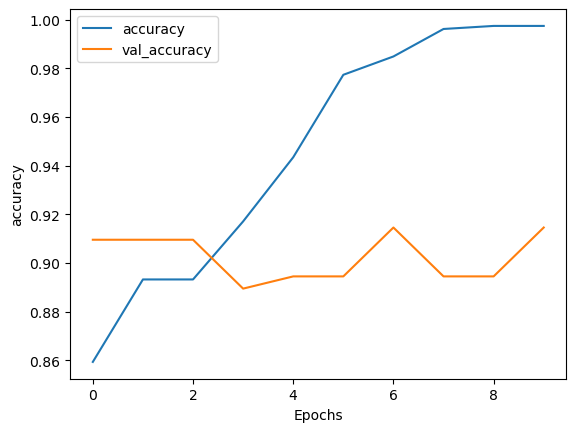

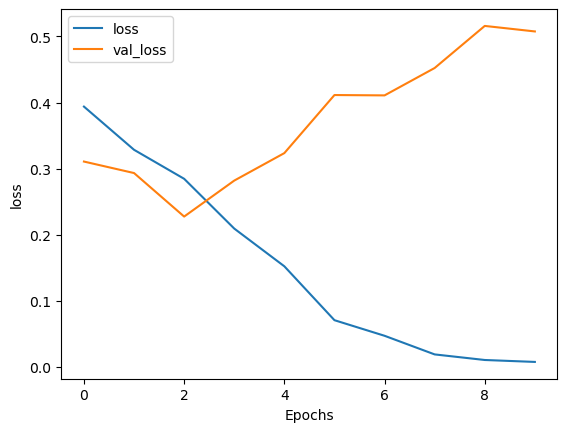

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
y_pred = np.where(model_bert.predict({ 'input_7' : X_test_token['input_ids'] , 'input_8' : X_test_token['attention_mask']}) >=0.5,1,0)

11/11 [==============================] - 83s 6s/step


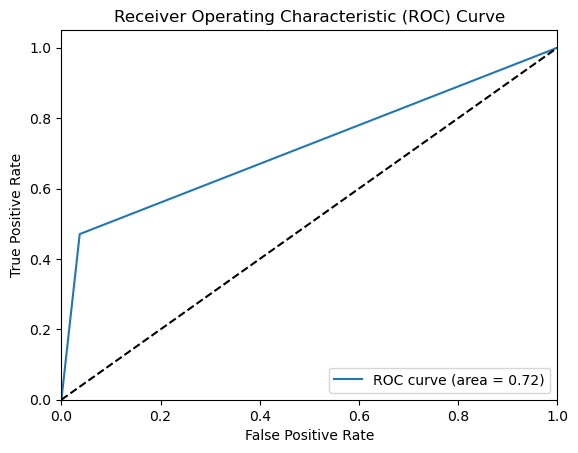

In [ ]:
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot a diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_bert.evaluate([X_test_token['input_ids'], X_test_token['attention_mask']], Y_test)

# Print the test loss and accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

11/11 [==============================] - 80s 6s/step - loss: 0.5208 - accuracy: 0.9127
Test Loss: 0.5208050608634949
Test Accuracy: 0.9126505851745605


## Interactive window with the best model

In [ ]:
def preprocess_text(text):
    # Tokenize the text
    encoded_text = bert_tokenizer.encode_plus(
        text=text,
        add_special_tokens=True,
        max_length=100,
        truncation=True,
        padding='max_length',
        return_tensors='tf',
        return_token_type_ids=False,
        return_attention_mask=True,
        verbose=True
    )

    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']

    return input_ids, attention_mask

In [ ]:
# Create a table object
table = PrettyTable()
table.field_names = ["Tweet", "User Label", "Predicted Label"]

tweet_count = 1

# Print the title
print("PREDICTION MODEL FOR FAKE NEWS IN US ELECTIONS")
print()

while True:

    print("-----------------------------------------------------------------")
    text = input(f"Enter Tweet {tweet_count} (or 'quit' to exit): ")
    if text == "quit":
        break

    label = input("Enter the label (1 for fake, 0 for real): ")
    tokenized_text = tokenize([text])
    predicted_probs = model_bert.predict({'input_3': tokenized_text['input_ids'], 'input_4': tokenized_text['attention_mask']})
    predicted_label = np.where(predicted_probs >= 0.5, 1, 0)

    print()
    print("-----------------------------------------------------------------")
    print()

    if label == "0":
        user_label = "real"
    else:
        user_label = "fake"

    if predicted_label == [[0]]:
        model_label = "real"
    else:
        model_label = "fake"

    print("TWEET", tweet_count)
    print("The user said that the tweet is:", user_label)
    print("The model said that the tweet is:", model_label)
    print()

    # Add the row to the table
    table.add_row([text, user_label, model_label])

    tweet_count += 1

PREDICTION MODEL FOR FAKE NEWS IN US ELECTIONS

-----------------------------------------------------------------
Enter Tweet 1 (or 'quit' to exit): @HillaryClinton is on the front page of the @nytimes waving to 200 people in New Hampshire. My crowd next door was 5,000 people – no pic!
Enter the label (1 for fake, 0 for real): 0
1/1 [==============================] - 0s 323ms/step

-----------------------------------------------------------------

TWEET 1
The user said that the tweet is: real
The model said that the tweet is: real

-----------------------------------------------------------------
Enter Tweet 2 (or 'quit' to exit): Beautiful morning walk in Hyde Park #London with @HillaryClinton. http://t.co/0aQNITRkvA
Enter the label (1 for fake, 0 for real): 1
1/1 [==============================] - 0s 293ms/step

-----------------------------------------------------------------

TWEET 2
The user said that the tweet is: fake
The model said that the tweet is: real

---------------------

In [ ]:
html_table = table.get_html_string()
display(HTML(html_table))

Tweet,User Label,Predicted Label
"@HillaryClinton is on the front page of the @nytimes waving to 200 people in New Hampshire. My crowd next door was 5,000 people – no pic!",real,real
Beautiful morning walk in Hyde Park #London with @HillaryClinton. http://t.co/0aQNITRkvA,fake,real
Hillary Clinton is a woman!!,real,real
Hillary Clinton has stolen our innovative WikiLeaks twitter logo design. Compare: @WikiLeaks vs @HillaryClinton http://t.co/mifka4mXf4,real,real
Thanks for joining #CGIU! MT @jimmykimmel: 3 Clintons &amp; a Kimmel @BillClinton @HillaryClinton @ChelseaClinton #selfie http://t.co/wkzgXdWec1,fake,real
"Services like Uber, Airbnb, and Lyft stimulate our economy and work towards lower prices. How is this bad @HillaryClinton?",real,real
BREAKING NEWS: If you face-swap @realDonaldTrump with @MayorofLondon you get Owen Wilson,real,real
Backstage at #CGI2013 with @HillaryClinton &amp; President Obama. Great discussion today on health care and the economy. http://t.co/0IKUvr6DK7,fake,real
Hey @realDonaldTrump you saw a kid lost in New York and didn't tell an adult. How can we trust you to be president? https://t.co/FUp7wgUA2c,real,real
@HillaryClinton Has The Ultimate Super Pac Called ‘The Mainstream Media’ #GOPDebate https://t.co/y70s8DyURo via @dailycaller,real,real


## References

references:

@article{shu2018fakenewsnet,
  title={FakeNewsNet: A Data Repository with News Content, Social Context and Dynamic Information for Studying Fake News on Social Media},
  author={Shu, Kai and  Mahudeswaran, Deepak and Wang, Suhang and Lee, Dongwon and Liu, Huan},
  journal={arXiv preprint arXiv:1809.01286},
  year={2018}
}

@article{shu2017fake,
  title={Fake News Detection on Social Media: A Data Mining Perspective},
  author={Shu, Kai and Sliva, Amy and Wang, Suhang and Tang, Jiliang and Liu, Huan},
  journal={ACM SIGKDD Explorations Newsletter},
  volume={19},
  number={1},
  pages={22--36},
  year={2017},
  publisher={ACM}
}

@article{shu2017exploiting,
  title={Exploiting Tri-Relationship for Fake News Detection},
  author={Shu, Kai and Wang, Suhang and Liu, Huan},
  journal={arXiv preprint arXiv:1712.07709},
  year={2017}
}